# Analysis
This notebook reads in the error metrics from each of the models and performs an analysis with them.

In [1]:
%reset -f

First load the necessary packages

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
from datetime import datetime
from tabulate import tabulate
from decimal import Decimal

from functions import MAE, RMSE

In [3]:
# Set global paths
ROOT_PATH = os.path.abspath(".").split("main")[0]

# configure matplotlib params and plotting
## use seaborn as this gives nicer plots than the standard 
sns.set()
sns.set_context('paper')
sns.set_style('whitegrid', {'axes.grid': True, 'grid.linestyle': '--'})

rc('figure', figsize=(12,6))
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize=14)
rc('ytick', labelsize=14)
rc('axes', labelsize=13, titlesize=14)
rc('legend', fontsize=14, handlelength=2)

### Read the dataframes from file
Read all the dataframes, convert them to floats and concatinate the dataframes

In [4]:
path = ROOT_PATH + "models/dataframes/"

# benchmarks 
heuristics_df = pd.read_pickle(path + "simple_heuristics_df.pkl")
linear_df = pd.read_pickle(path + "linear_models_df.pkl")
ml_df = pd.read_pickle(path + "ml_df.pkl")

## concat the benchmarks
benchmarks_merge = pd.concat([heuristics_df, linear_df,ml_df])
benchmarks_merge = benchmarks_merge.apply(pd.to_numeric)

# deep learning
gru_summary = pd.read_pickle(path+"gru_summary_df_2.pkl")
gru_uncertainty = pd.read_pickle(path+"gru_uncertainty_df_2.pkl")
lstm_summary = pd.read_pickle(path+"lstm_summary_df_2.pkl")
lstm_uncertainty = pd.read_pickle(path+"lstm_uncertainty_df_2.pkl")

## concat the deep learning models
deep_summary_merge = pd.concat([lstm_summary, gru_summary], axis=0)
deep_uncertainty_merge = pd.concat([lstm_uncertainty, gru_uncertainty], axis=0)

# concat the deep learning models with benchmarks
all_models_df = pd.concat([deep_summary_merge,benchmarks_merge],axis=0)

In [5]:
# helper function to latexify a dataframe
def latexify(df):
    multirow = type(df.index) == pd.core.indexes.multi.MultiIndex
    multicolumn = type(df.columns) == pd.core.indexes.multi.MultiIndex
    
    col_format = "ll" if multirow else "l"
    col_format += "c"*len(df.columns.levels[1])*2 if multicolumn else "c"*len(df.columns)
    
    tex = df.to_latex(column_format=col_format,
                      multicolumn=multicolumn, 
                      multicolumn_format='c',
                      multirow=multirow,
                      bold_rows=True)
    
    return tex

## Deep Learning
---

In [21]:
deep_summary_merge_sorted = deep_summary_merge.sort_values(by=('Test','Avg'))
deep_summary_merge_sorted = deep_summary_merge_sorted.round(4)
tex_summary = latexify(deep_summary_merge_sorted)
print(tex_summary)
deep_summary_merge_sorted

\begin{tabular}{lcccccccc}
\toprule
{} & \multicolumn{4}{c}{Validation} & \multicolumn{4}{c}{Test} \\
{} &         FT &      TT &      PT &     Avg &      FT &      TT &      PT &     Avg \\
\midrule
\textbf{LSTM Vanilla (128)} &     0.5742 &  0.3249 &  0.4132 &  0.4374 &  0.5999 &  0.2823 &  0.4784 &  0.4535 \\
\textbf{GRU Vanilla (512) } &     0.5831 &  0.3779 &  0.4267 &  0.4626 &  0.6205 &  0.2800 &  0.4836 &  0.4614 \\
\textbf{LSTM Vanilla (512)} &     0.6202 &  0.3360 &  0.4359 &  0.4640 &  0.6422 &  0.2893 &  0.4997 &  0.4771 \\
\textbf{GRU Vanilla (128) } &     0.6094 &  0.3495 &  0.4449 &  0.4679 &  0.6318 &  0.3356 &  0.4998 &  0.4891 \\
\bottomrule
\end{tabular}



Validation                            Test                  \
                           FT      TT      PT     Avg      FT      TT      PT   
LSTM Vanilla (128)     0.5742  0.3249  0.4132  0.4374  0.5999  0.2823  0.4784   
GRU Vanilla (512)      0.5831  0.3779  0.4267  0.4626  0.6205  0.2800  0.4836   
LSTM Vanilla (512)     0.6202  0.3360  0.4359  0.4640  0.6422  0.2893  0.4997   
GRU Vanilla (128)      0.6094  0.3495  0.4449  0.4679  0.6318  0.3356  0.4998   

                            
                       Avg  
LSTM Vanilla (128)  0.4535  
GRU Vanilla (512)   0.4614  
LSTM Vanilla (512)  0.4771  
GRU Vanilla (128)   0.4891

In [7]:
tex_uncertainty = latexify(deep_uncertainty_merge)
print(tex_uncertainty)
deep_uncertainty_merge

\begin{tabular}{llcccccc}
\toprule
                  &     & \multicolumn{3}{c}{Validation} & \multicolumn{3}{c}{Test} \\
                  &     &        MAE & Exp. Mean & Exp. Std &     MAE & Exp. Mean & Exp. Std \\
\midrule
\multirow{4}{*}{\textbf{LSTM Vanilla (512)}} & \textbf{FT} &     0.6202 &   -0.6259 &   0.2857 &  0.6422 &   -0.2476 &   0.2691 \\
                  & \textbf{TT} &     0.3360 &    1.2736 &   0.1532 &  0.2893 &    0.8875 &   0.1761 \\
                  & \textbf{PT} &     0.4359 &    0.0217 &   0.1992 &  0.4997 &    0.0404 &   0.1966 \\
                  & \textbf{Avg} &     0.4640 &    0.2231 &   0.2127 &  0.4771 &    0.2268 &   0.2139 \\
\cline{1-8}
\multirow{4}{*}{\textbf{LSTM Vanilla (128)}} & \textbf{FT} &     0.5742 &   -0.7258 &   0.1928 &  0.5999 &   -0.2916 &   0.1872 \\
                  & \textbf{TT} &     0.3249 &    1.2496 &   0.1890 &  0.2823 &    0.8696 &   0.1788 \\
                  & \textbf{PT} &     0.4132 &   -0.0393 &   0.1524 &  0.4784 &   

Validation                       Test            \
                              MAE Exp. Mean Exp. Std     MAE Exp. Mean   
LSTM Vanilla (512) FT      0.6202   -0.6259   0.2857  0.6422   -0.2476   
                   TT      0.3360    1.2736   0.1532  0.2893    0.8875   
                   PT      0.4359    0.0217   0.1992  0.4997    0.0404   
                   Avg     0.4640    0.2231   0.2127  0.4771    0.2268   
LSTM Vanilla (128) FT      0.5742   -0.7258   0.1928  0.5999   -0.2916   
                   TT      0.3249    1.2496   0.1890  0.2823    0.8696   
                   PT      0.4132   -0.0393   0.1524  0.4784    0.0003   
                   Avg     0.4374    0.1615   0.1781  0.4535    0.1928   
GRU Vanilla (512)  FT      0.5831   -0.6627   0.1937  0.6205   -0.2981   
                   TT      0.3779    1.2439   0.2710  0.2800    0.9386   
                   PT      0.4267   -0.0474   0.1696  0.4836    0.0254   
                   Avg     0.4626    0.1779   0.2114  0.4614    0.2220   
GRU Vanilla (128)  FT      0.6094   -0.5194   0.2501  0.6318   -0.2692   
                   TT      0.3495    1.0908   0.2280  0.3356    0.9136   
                   PT      0.4449   -0.0081   0.2386  0.4998    0.0118   
                   Avg     0.4679    0.1878   0.2389  0.4891    0.2188   

                                 
                       Exp. Std  
LSTM Vanilla (512) FT    0.2691  
                   TT    0.1761  
                   PT    0.1966  
                   Avg   0.2139  
LSTM Vanilla (128) FT    0.1872  
                   TT    0.1788  
                   PT    0.1450  
                   Avg   0.1703  
GRU Vanilla (512)  FT    0.2060  
                   TT    0.2000  
                   PT    0.1601  
                   Avg   0.1887  
GRU Vanilla (128)  FT    0.2179  
                   TT    0.1968  
                   PT    0.1833  
                   Avg   0.1993

## All models
---

In [18]:
# sort the table by average test error
all_models_df_sorted = all_models_df.sort_values([('Test','Avg')])

# round to 3 digits
all_models_df_sorted = all_models_df_sorted.round(3)
print(latexify(all_models_df_sorted))
all_models_df_sorted

\begin{tabular}{lcccccccc}
\toprule
{} & \multicolumn{4}{c}{Validation} & \multicolumn{4}{c}{Test} \\
{} &         FT &     TT &     PT &    Avg &     FT &     TT &     PT &    Avg \\
\midrule
\textbf{LSTM Vanilla (128)} &      0.574 &  0.325 &  0.413 &  0.437 &  0.600 &  0.282 &  0.478 &  0.454 \\
\textbf{GRU Vanilla (512) } &      0.583 &  0.378 &  0.427 &  0.463 &  0.620 &  0.280 &  0.484 &  0.461 \\
\textbf{LSTM Vanilla (512)} &      0.620 &  0.336 &  0.436 &  0.464 &  0.642 &  0.289 &  0.500 &  0.477 \\
\textbf{GRU Vanilla (128) } &      0.609 &  0.350 &  0.445 &  0.468 &  0.632 &  0.336 &  0.500 &  0.489 \\
\textbf{Prev.             } &      0.815 &  0.165 &  0.525 &  0.501 &  0.863 &  0.184 &  0.562 &  0.537 \\
\textbf{RF                } &      0.681 &  0.250 &  0.595 &  0.509 &  0.703 &  0.299 &  0.630 &  0.544 \\
\textbf{GBM               } &      0.667 &  0.234 &  0.585 &  0.496 &  0.737 &  0.282 &  0.633 &  0.550 \\
\textbf{ElNet             } &      0.845 &  0.315 &  0.548

Validation                        Test                     
                           FT     TT     PT    Avg     FT     TT     PT    Avg
LSTM Vanilla (128)      0.574  0.325  0.413  0.437  0.600  0.282  0.478  0.454
GRU Vanilla (512)       0.583  0.378  0.427  0.463  0.620  0.280  0.484  0.461
LSTM Vanilla (512)      0.620  0.336  0.436  0.464  0.642  0.289  0.500  0.477
GRU Vanilla (128)       0.609  0.350  0.445  0.468  0.632  0.336  0.500  0.489
Prev.                   0.815  0.165  0.525  0.501  0.863  0.184  0.562  0.537
RF                      0.681  0.250  0.595  0.509  0.703  0.299  0.630  0.544
GBM                     0.667  0.234  0.585  0.496  0.737  0.282  0.633  0.550
ElNet                   0.845  0.315  0.548  0.570  0.794  0.314  0.639  0.582
LASSO                   0.846  0.313  0.550  0.570  0.796  0.314  0.639  0.583
Ridge                   0.707  0.300  0.908  0.638  0.720  0.306  0.883  0.636
Linear                  0.688  0.303  0.961  0.651  0.714  0.301  0.924  0.646
MA                      0.733  0.752  0.802  0.763  0.833  0.717  0.841  0.797
Mean                    0.945  1.131  0.802  0.960  0.867  1.162  0.842  0.957

### Stacked histogram

<Figure size 1080x576 with 0 Axes>

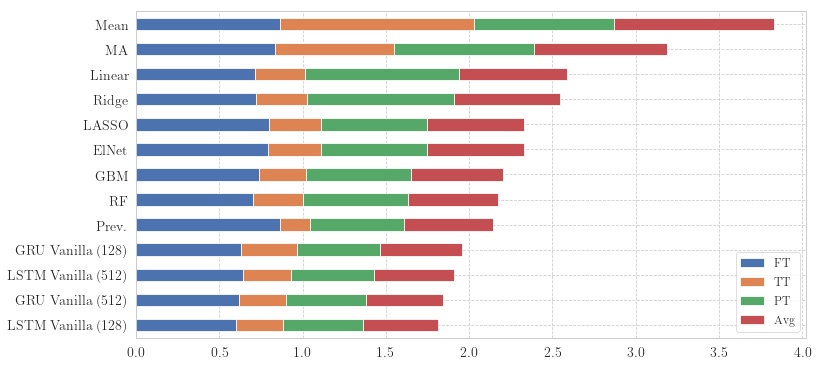

In [17]:
plt.figure(figsize=(15,8))
all_models_df_sorted['Test'].plot.barh(stacked=True)
plt.legend(prop={'size': 12})
plt.show()

### Plot the error of each model w.r.t. each target

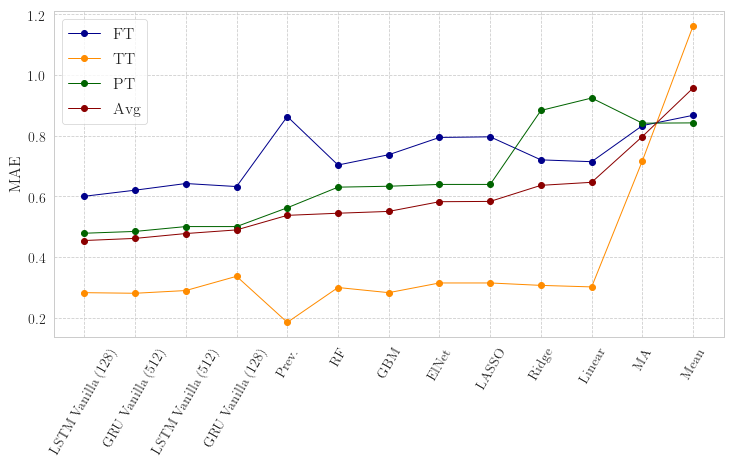

In [10]:
x_axis = all_models_df_sorted['Test'].index.tolist()
plt.figure()
plt.plot(all_models_df_sorted['Test']['FT'], marker="o", markersize=6, lw=1, c="darkblue", label="FT")
plt.plot(all_models_df_sorted['Test']['TT'], marker="o", markersize=6, lw=1, c="darkorange", label="TT")
plt.plot(all_models_df_sorted['Test']['PT'], marker="o", markersize=6, lw=1, c="darkgreen", label="PT")
plt.plot(all_models_df_sorted['Test']['Avg'], marker="o", markersize=6, lw=1, c="darkred", label="Avg")
plt.xticks(all_models_df_sorted.index.tolist(), rotation=60)
plt.ylabel("MAE", fontsize=16)
plt.legend(prop={'size': 16})
plt.show()

## Experimental

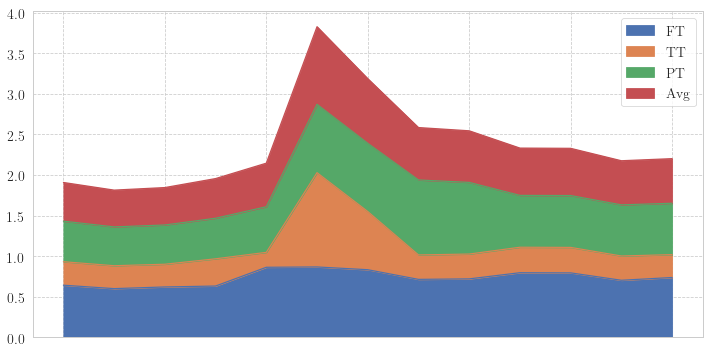

In [11]:
all_models_df['Test'].plot.area()